In [1]:
%matplotlib inline
import plot_helpers as ph
from matplotlib import pyplot as plt

In [2]:
fairgp_files = [
    ('../results/ICML/propublica-opp-odds_2018-09-21/propublica-recidivism_race_numerical-binsensitive-origin.csv', ''),
    ('../results/propublica-opp-odds_2018-09-21/propublica-recidivism_sex_numerical-binsensitive-origin.csv', ''),
]
def label_change(label):
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[4] == "True"
    tnr = parts[6]
    if not in_True and tnr != "0.717":
        return
    if in_True and tnr != "0.698":
        return
    optional_star = "*" if in_True else ""
    with_s = ", use $s$" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    #return "average" if mode == "True" else mode, True
    num = label.split('_')[-1]
    return f"$TPR_t={num}${with_s}", not in_True

fairgp = ph.parse_all(fairgp_files, label_change)

In [3]:
baseline_files = [
    ('../results/parity_opp_update_2018-08-28/opp_fixed/propublica-recidivism_race_baseline.csv', ''),
    #('../results/parity_opp_update_2018-08-28/opp_fixed/propublica-recidivism_sex_baseline.csv', ''),
]
def label_change(label):
#     algos = [
#         #'ZafarFairness',
#         #'ZafarAccuracy',
#         'ZafarEqOpp',
#         'SVM',
#         #'GP',
#         #'DecisionTree',
#     ]
    if label == 'ZafarEqOpp':
        return 'baseline: Zafar', True
    if label == 'SVM':
        return 'baseline: SVM', True

baselines = ph.parse_all(baseline_files, label_change)

In [4]:
data = ph.merge_plot_defs(fairgp, baselines)

In [5]:
fairgp = ph.choose_entries(fairgp, [0, 5, 1, 6, 2, 7, 3, 8])
#baselines = ph.choose_entries(baselines, [1, 0])

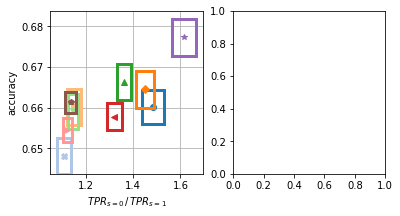

In [6]:
xaxis = ('race-TPRRatio', '$TPR_{s=0}\\,/\\,TPR_{s=1}$')
yaxis = ('accuracy', 'accuracy')
fig, plots = plt.subplots(ncols=2, figsize=(6, 3))
ph.errorbox(plots[0], fairgp[0], xaxis, yaxis, legend=None)
ph.errorbox(plots[0], baselines[0], xaxis, yaxis, legend=None, firstcolor=4, firstshape=8)
#plot.set_ylim(0.785, 0.865)
#plot.set_xlim(0.2, 1.5)
#fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/eqopp_acc_vs_tprratio.eps", dpi=200, bbox_extra_artists=[legend], bbox_inches='tight')

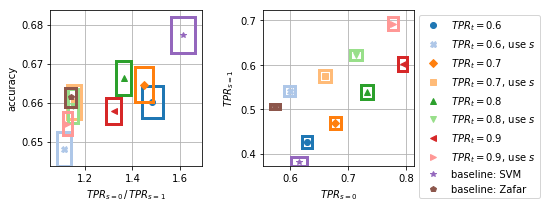

In [7]:
xaxis = ('0-TPR-race', '$TPR_{s=0}$')
yaxis = ('1-TPR-race', '$TPR_{s=1}$')
# fig, plot = plt.subplots(figsize=(4, 4))
legends = []
legends.append(ph.errorbox(plots[1], fairgp[0], xaxis, yaxis, legend="outside"))
legends.append(ph.errorbox(plots[1], baselines[0], xaxis, yaxis, legend="outside", firstcolor=4, firstshape=8))
fig.tight_layout()
#plot.set_ylim(0.785, 0.865)
#plot.set_xlim(0.2, 1.5)
fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/eqopp2.pdf", dpi=200, bbox_extra_artists=legends, bbox_inches='tight')
fig

In [6]:
ms = 4

(0.98, 1.8)

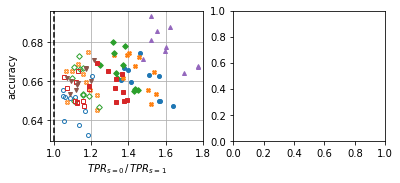

In [26]:
xaxis = ('race-TPRRatio', '$TPR_{s=0}\\,/\\,TPR_{s=1}$')
yaxis = ('accuracy', 'accuracy')
fig, plots = plt.subplots(ncols=2, figsize=(6, 2.4))
plots[0].axvline(x=1.0, linestyle='--', color='k')
ph.scatter(plots[0], fairgp[0], xaxis, yaxis, legend=None, markersize=ms)
ph.scatter(plots[0], baselines[0], xaxis, yaxis, legend=None, startindex=4, markersize=ms)
#plot.set_ylim(0.785, 0.865)
plots[0].set_xlim(0.98, 1.8)
#fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/eqopp_acc_vs_tprratio.eps", dpi=200, bbox_extra_artists=[legend], bbox_inches='tight')

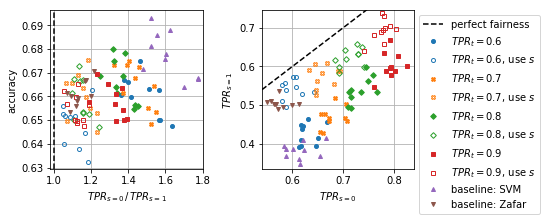

In [27]:
xaxis = ('0-TPR-race', '$TPR_{s=0}$')
yaxis = ('1-TPR-race', '$TPR_{s=1}$')
# fig, plot = plt.subplots(figsize=(4, 4))
legends = []
plots[1].plot([0.0, 1.0], [0.0, 1.0], 'k--', label="perfect fairness")
legends.append(ph.scatter(plots[1], fairgp[0], xaxis, yaxis, legend="outside", markersize=ms))
legends.append(ph.scatter(plots[1], baselines[0], xaxis, yaxis, legend="outside", startindex=4, markersize=ms))
fig.tight_layout()
fig.subplots_adjust(bottom=0)
plots[1].set_ylim(0.335, 0.745)
plots[1].set_xlim(0.54, 0.84)
fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/eqopp.pdf", bbox_extra_artists=legends,
            bbox_inches='tight', pad_inches=0)
fig